<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>SVM, Kernel Trick (практика)</center></h2>

**Срок сдачи:** 24 апреля 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 24 апреля, -4 балла после 06:00 1 мая, -6 баллов после 06:00 8 мая

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

%matplotlib inline

plt.style.use('ggplot')

plt.rcParams['figure.figsize'] = (12, 6)

# Регрессия с SVM (3 балла)

Загрузите набор данных из *titanium.csv*<br/>
Мы будем решать задачу восстановления столбца 'y' по столбцу 'x'.

## Визуализация данных (1 балл)

Выполните стандартную предобработку данных (z-score) и выведите их на графике.

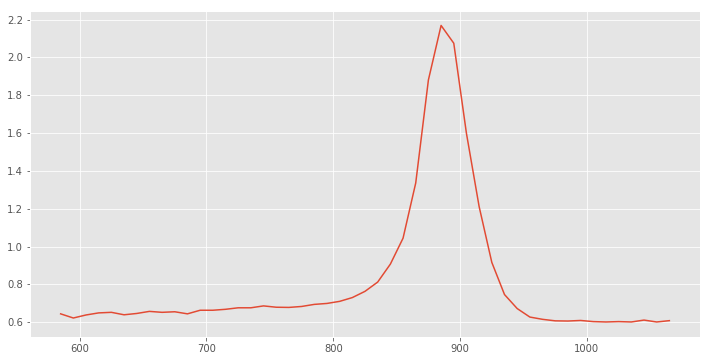

In [2]:
# Your Code Here
data = pd.read_csv ('titanium.csv')

x = (data.x - data.x.mean())/data.x.std ()
y = (data.y - data.y.mean())/data.y.std ()

plt.plot (data.x.values, data.y.values)

## Обучение моделей (2 балла)

Рассмотрите 3 ядра: 
* Линейное
* Полиномиальное (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Во всех случаях установить ширину трубки `epsilon=0.01`

Для каждого из ядер:
1. Пусть `C = np.logspace(-2, 2, 10)`. Постройте графики зависимости ошибки от параметра $C$ (ось графика со значениями параметра $C$ должна быть в логарифмической шкале). Ошибка измеряется как средняя абсолютная ошибка. 
2. Для наулучшего параметра $С$ каждого из ядер постройте график с данными и предстазанием по svm

В каких случаях возникает эффекты недообучения, переобучения?

In [3]:
from sklearn.metrics import mean_absolute_error

In [4]:
reshaped = x.values.reshape (x.shape[0],1)

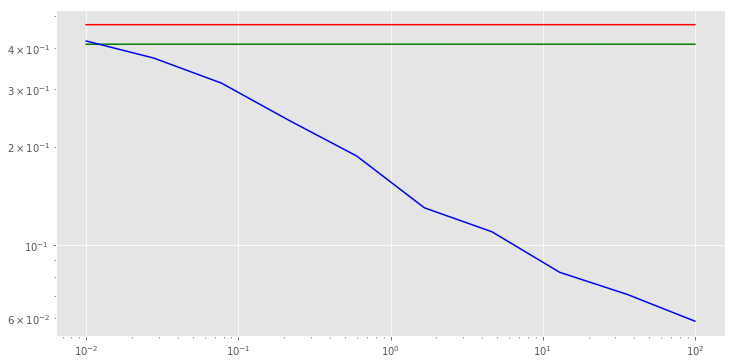

In [5]:
## Your Code Here
C = np.logspace(-2, 2, 10)
err_l = []
err_p = []
err_r = []
for c in C:
    cl_lin = SVR (kernel='linear',epsilon=0.01, C=c)
    cl_pol = SVR (kernel='poly', degree=3, gamma=6, coef0=1, C=c, epsilon=0.01)
    cl_rbf = SVR (kernel='rbf', gamma=6, coef0=1, C=c, epsilon=0.01)
    cl_lin.fit (reshaped,y)
    cl_pol.fit (reshaped,y)
    cl_rbf.fit (reshaped,y)
    pred_l = cl_lin.predict (reshaped)
    pred_p = cl_pol.predict (reshaped)
    pred_r = cl_rbf.predict (reshaped)
    err_l.append(mean_absolute_error (y, pred_l))
    err_p.append(mean_absolute_error (y, pred_p))
    err_r.append(mean_absolute_error (y, pred_r))
plt.loglog (C, err_l,c='r')
plt.loglog (C, err_p,c='g')
plt.loglog (C, err_r,c='b')
plt.show ()

In [6]:
print C

[  1.00000000e-02   2.78255940e-02   7.74263683e-02   2.15443469e-01
   5.99484250e-01   1.66810054e+00   4.64158883e+00   1.29154967e+01
   3.59381366e+01   1.00000000e+02]


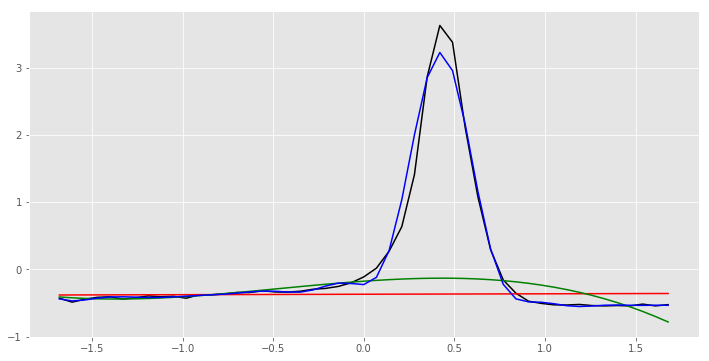

In [7]:
plt.plot (reshaped,y, c='black')
plt.plot (reshaped,pred_l, c='r')
plt.plot (reshaped,pred_p, c='g')
plt.plot (reshaped,pred_r, c='b')

# Определение языка слова (7 баллов)

В данном задании вам необходимо определить, на каком языке написано слово.

Вам будет дано два текста - первые предложения произведения "Война и Мир" на английком и испанском, разбитые на слова. У слов нет общепринятого числового представления, поэтому мы предлагаем вам реализовать собственноге ядро для SVM, основанное на редакторском расстоянии или [расстоянии Левинштейна](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D1%88%D1%82%D0%B5%D0%B9%D0%BD%D0%B0). 

Имплементировать расстояние Леванштейна не нужно - можно взять любую доступную реализацию, например [здесь](https://github.com/toastdriven/pylev) или [здесь](https://github.com/ztane/python-Levenshtein).

## Загрузка (1 балл)

Загрузите данные из файлов *war_and_peace_es.txt* и *war_and_peace_en.txt*.<br/> 
В результате вы должны получить pandas.DataFrame со столбцами *index* | *word* | *label*, где *index* - это индекс pandas, *word* - это слово и *label* - это метка класса (0 или 1)

In [8]:
## Your Code Here
df = pd.read_csv ('war_and_peace_en.txt', header=-1, names=['word', 'label'])
df.label = 0
print df.shape
df_es = pd.read_csv ('war_and_peace_es.txt', header=-1, names=['word', 'label'])
df_es.label = 1
df = df.append (df_es, ignore_index=True)
df.tail ()

(5044, 2)


,word,label
11398,cui,1
11399,gli,1
11400,ospiti,1
11401,sarebbero,1
11402,ritrovati,1


In [9]:
# like this

df.head()

,word,label
0,war,0
1,and,0
2,peace,0
3,leo,0
4,tolstoy,0


## Подготовка данных (2 балла)

Особенностью пользовательского ядра в sklean.SVC является то, что на вход оно должно принимать именно вектора чисел.<br/>
В нашем случае это будут индексы соответствующих слов из корпуса. То есть вместо вектора ['treat', 'celebrit', 'prince', ...] на вход в ядро подается вектор из индексов [9209, 11145, 7735, ...] с помощью которых вы будете находить сами слова.

Прежде чем мы начнем строить ядро, надо подготовить данные. Для этого:
1. Задайте переменную RND_SEED, которая будет использоваться в любых генераторах случайных чисел в вашем коде (обычно параметр "random_seed")
2. Случайным образом перемешайте и заново проиндексируйте таблицу, полученную выше (используйте методы df.sample() и df.reset_index())
3. Ядро может вычисляться достаточно долго, поэтому можете урезать таблицу, но оставить в ней не менее 1000 слов.
4. Разбейте данные на обучающую и контрольную выборку в пропорции 60/40

В результате вы должны получить вектор-столбец X_train, X_test с **индексами** слов и векторы y_train, y_test с метками классов.

In [10]:
from sklearn.model_selection import train_test_split
import pylev

In [11]:
RND_SEED = 228
df_suffle = df.sample (random_state=RND_SEED,n=1001)
df_suffle = df_suffle.reset_index(drop=True)
train, test = train_test_split (df_suffle, test_size=0.4, random_state=RND_SEED)
X_train = train.word
y_train = train.label
X_test = test.word
y_test = test.label

## Расчет ядра (3 балла)

Некоторые указания по составлению пользовательского ядра можно найти [здесь](http://stackoverflow.com/questions/26962159/how-to-use-a-custom-svm-kernel).

Если в двух словах:<br/>
Функция, реазлизующая расчет ядра должна принимать две матрицы $U$ и $V$ с признаковым описанием объектов (во време обучения они обе относятся к обучающей выборке, а во время применения - одна матрица относится к обучающей выборке, а другая к контрольной).

В результате, функция должна возвращать матрицу ядра $G_{ij} = K(U_i, V_j)$.

Таким образом, в этом задании вам надо:
1. Написать функцию *string_kernel(U, V)*, расчитывающее матрицу ядра $G_{ij}$
2. Визуализировать матрицу только для обучающей выборки (функция plt.imshow()).

**ВАЖНО**<br/>
На лекции мы рассмотрели, что ядро должно обладать определенными свойствами, поэтому не получится рассчитать $G_{ij}$ как расстояние Левинштейна между словами $\text{word}_i$ и $\text{word}_j$.<br/>
Вместо этого используйте какое-нибудь готовое ядро, зависящее от расстояние между объектами.

In [12]:
def K_function (u, v):
    gamma = 0.05
    dist = pylev.levenshtein (u, v)
    return np.exp(-gamma * dist * dist)

def string_kernel(U, V):
    #Your Code Here
    matrix = np.zeros((U.shape[0], V.shape[0]))
    for i, u in enumerate(U):
        for j, v in enumerate(V):
            matrix[i, j] = K_function(u, v)
    return matrix

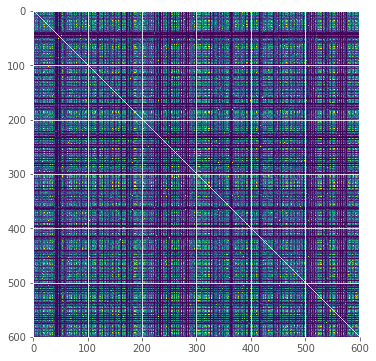

In [13]:
G = string_kernel(X_train, X_train)
plt.imshow(G)

## Оценка качества (1 балл)

Обучите метод опорных векторов с различными значениями параметра штрафа $C$.<br/>
Для каждого значения выведите accuracy на обучащюей и контрольной выборке.

Постарайтесь достичь качества в 70% на тестовой выборке

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
# Your Code Here
cl = SVC (kernel='precomputed', random_state=RND_SEED)
cl.fit (G, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto',
  kernel='precomputed', max_iter=-1, probability=False, random_state=228,
  shrinking=True, tol=0.001, verbose=False)

In [16]:
result = cl.predict (string_kernel(X_test, X_train))
accuracy_score (y_test, result)

0.76309226932668328